In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets//dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [5]:
cat_cols = ['Month','Year','Region']
dengue[cat_cols] = dengue[cat_cols].astype('category')

In [6]:
dengue.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1>Dengue Selected Years and Personal Investigation</h1>

In [7]:
dengue['Year'].unique()

[2016, 2017, 2018, 2019, 2020]
Categories (5, int64): [2016, 2017, 2018, 2019, 2020]

In [8]:
dengue['Fatality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

In [9]:
dengue_2016 = dengue[dengue['Year'] == 2016]
dengue_2017 = dengue[dengue['Year'] == 2017]
dengue_2018 = dengue[dengue['Year'] == 2018]
dengue_2019 = dengue[dengue['Year'] == 2019]
dengue_2020 = dengue[dengue['Year'] == 2020]

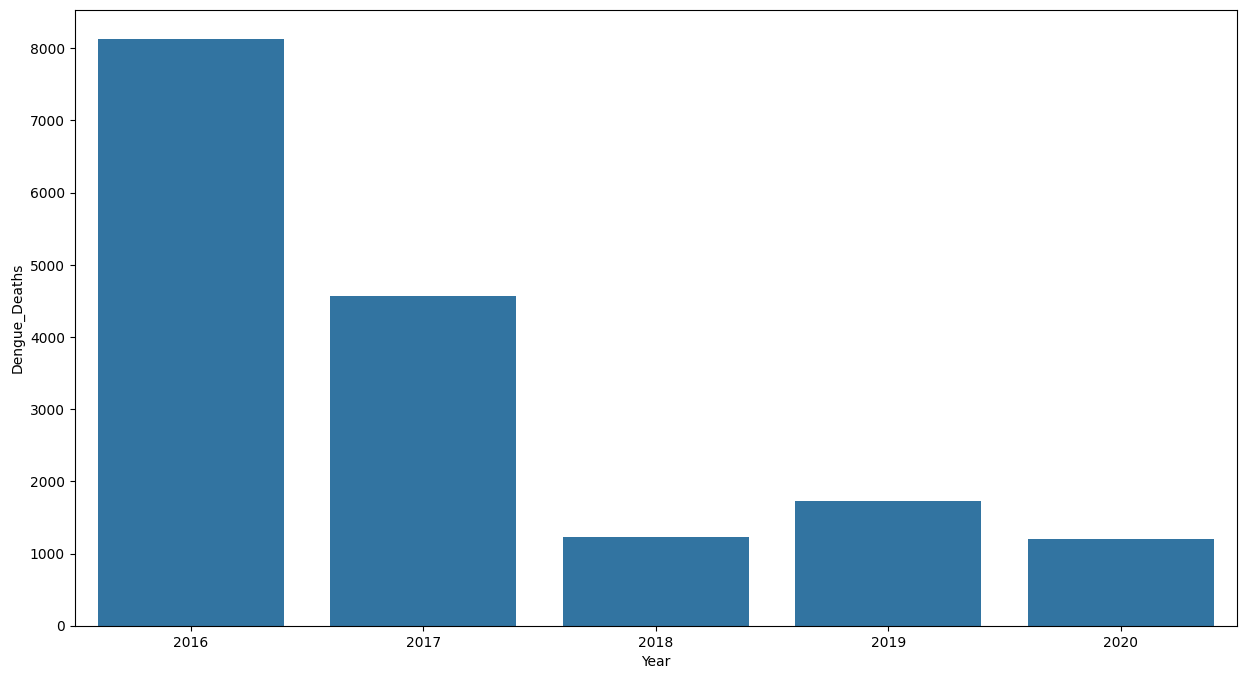

In [10]:
dengue_yearly = dengue.groupby('Year')['Dengue_Deaths'].sum().reset_index()

sns.barplot(data=dengue_yearly, x="Year", y="Dengue_Deaths")
plt.gcf().set_size_inches(15,8)
plt.show()

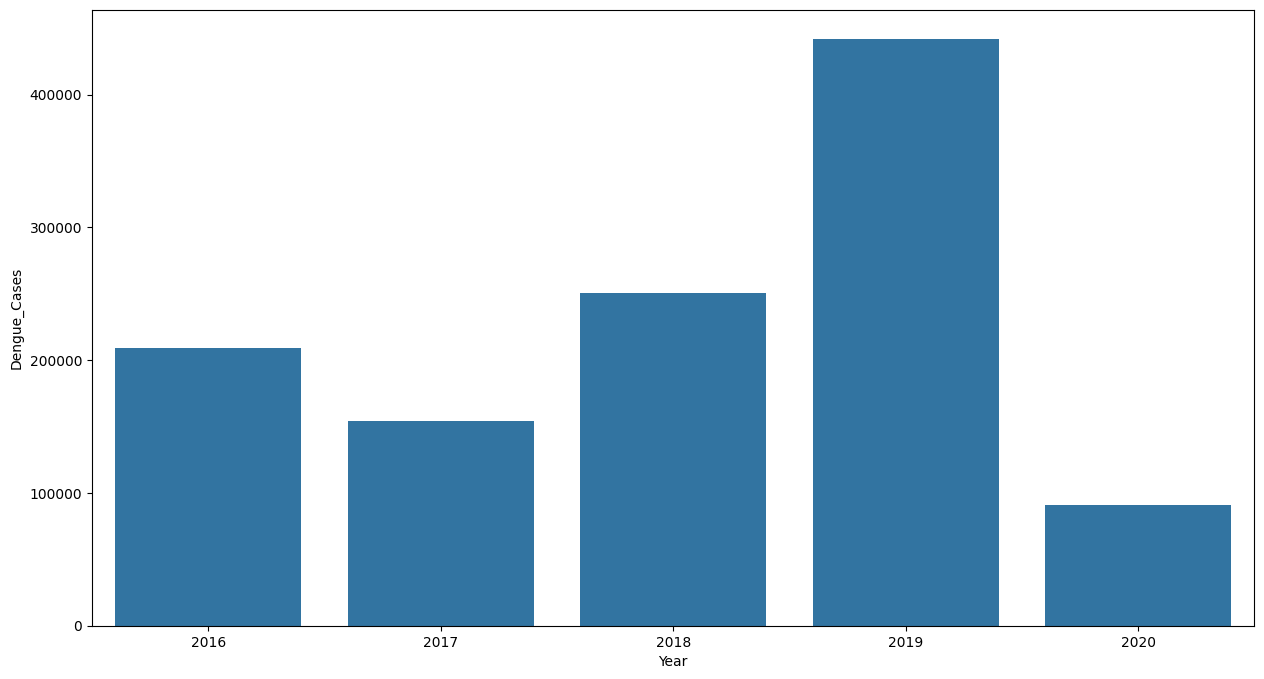

In [11]:
dengue_yearly = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()

sns.barplot(data=dengue_yearly, x="Year", y="Dengue_Cases")
plt.gcf().set_size_inches(15,8)
plt.show()


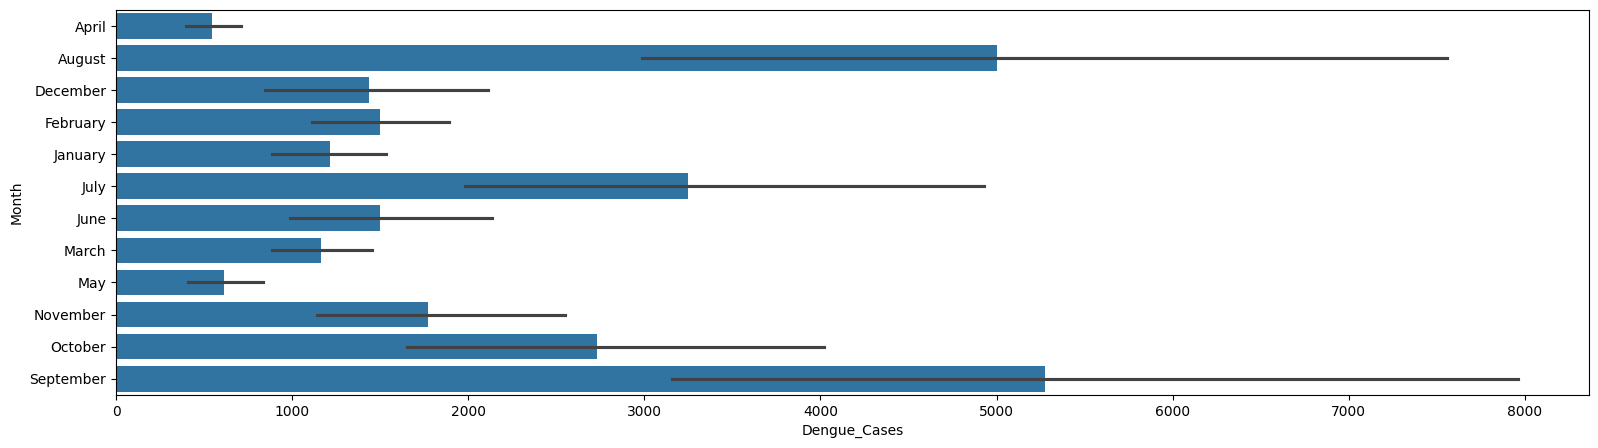

In [12]:
sns.barplot(data=dengue_2019, x="Dengue_Cases", y="Month")
plt.gcf().set_size_inches(19, 5) 
plt.show()

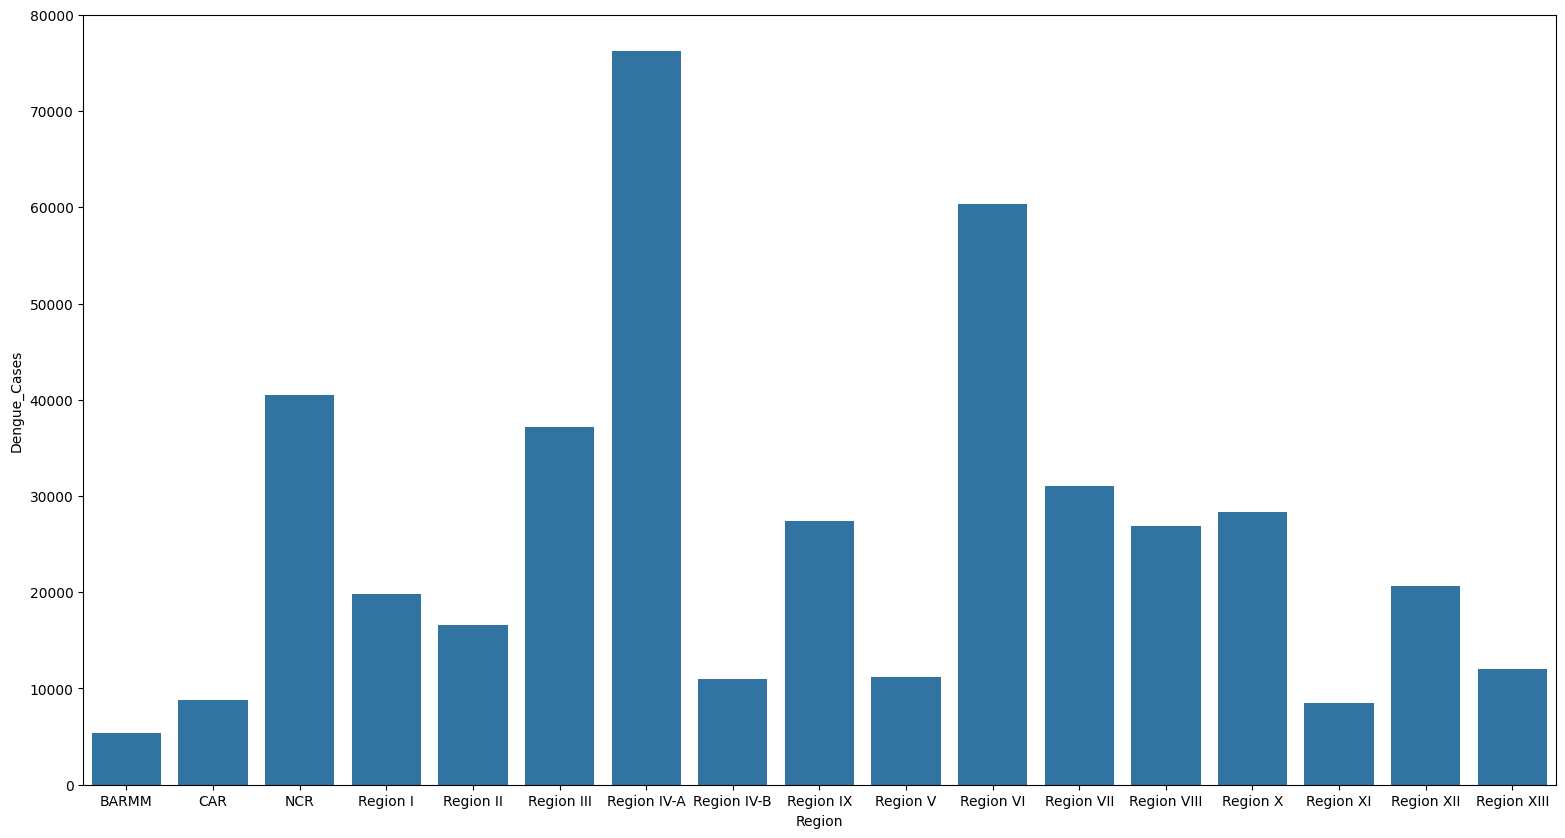

In [13]:
dengue_Regions_cases = dengue_2019.groupby('Region')['Dengue_Cases'].sum().reset_index()
sns.barplot(data=dengue_Regions_cases, x="Region", y="Dengue_Cases")
plt.gcf().set_size_inches(19, 10) 
plt.show()
# dengue_Regions_cases

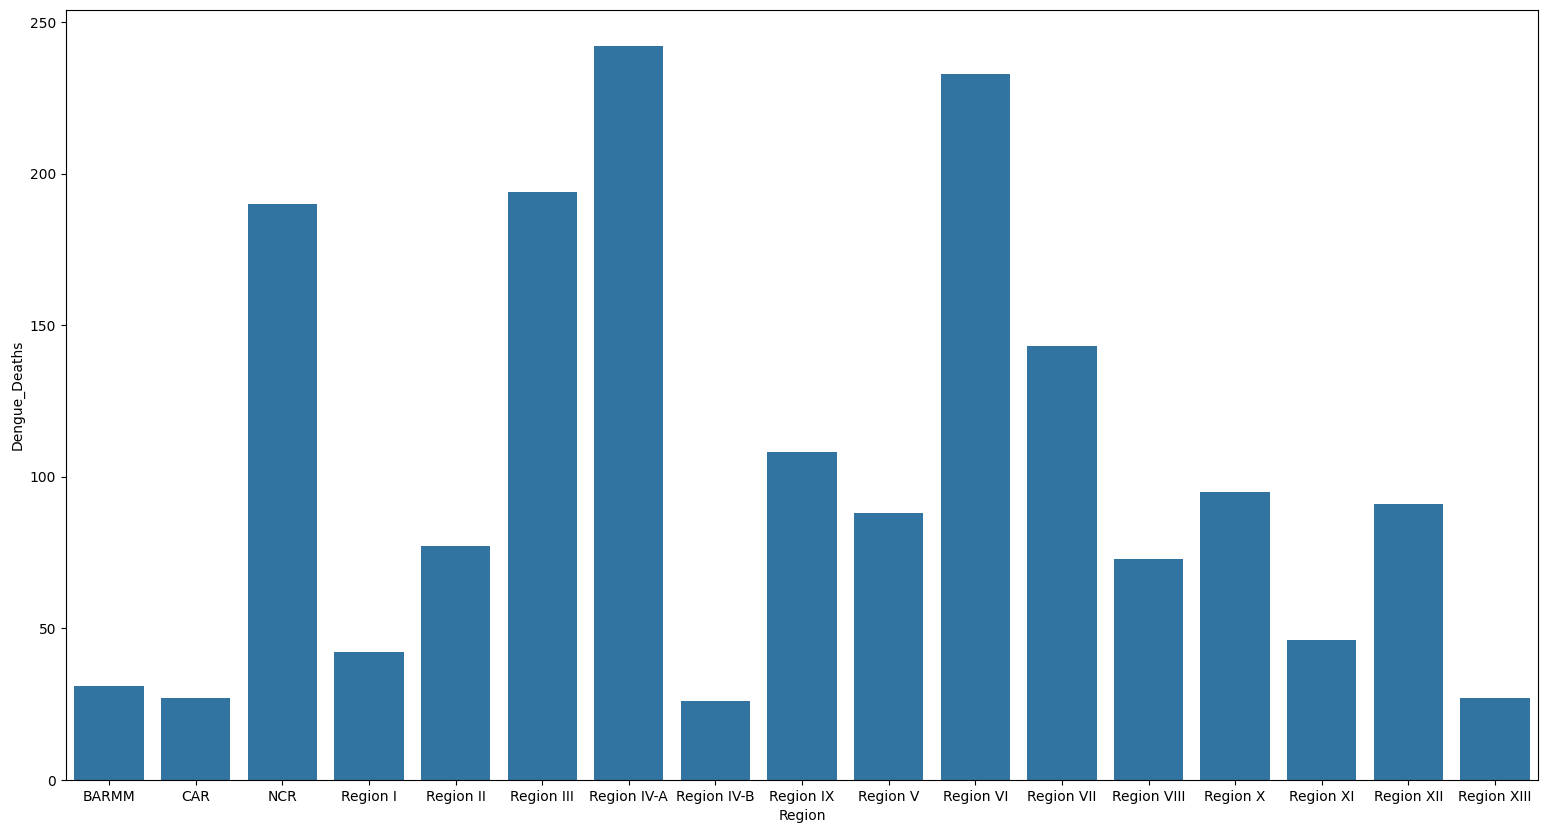

In [14]:
dengue_Regions_cases = dengue_2019.groupby('Region')['Dengue_Deaths'].sum().reset_index()
sns.barplot(data=dengue_Regions_cases, x="Region", y="Dengue_Deaths")
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1 style='font-size: 48px'>Insights:</h1>

# Year 2016

<h1>No.1 Are there Any Regions with Significantly Higher Dengue Cases Than Others?</h1>

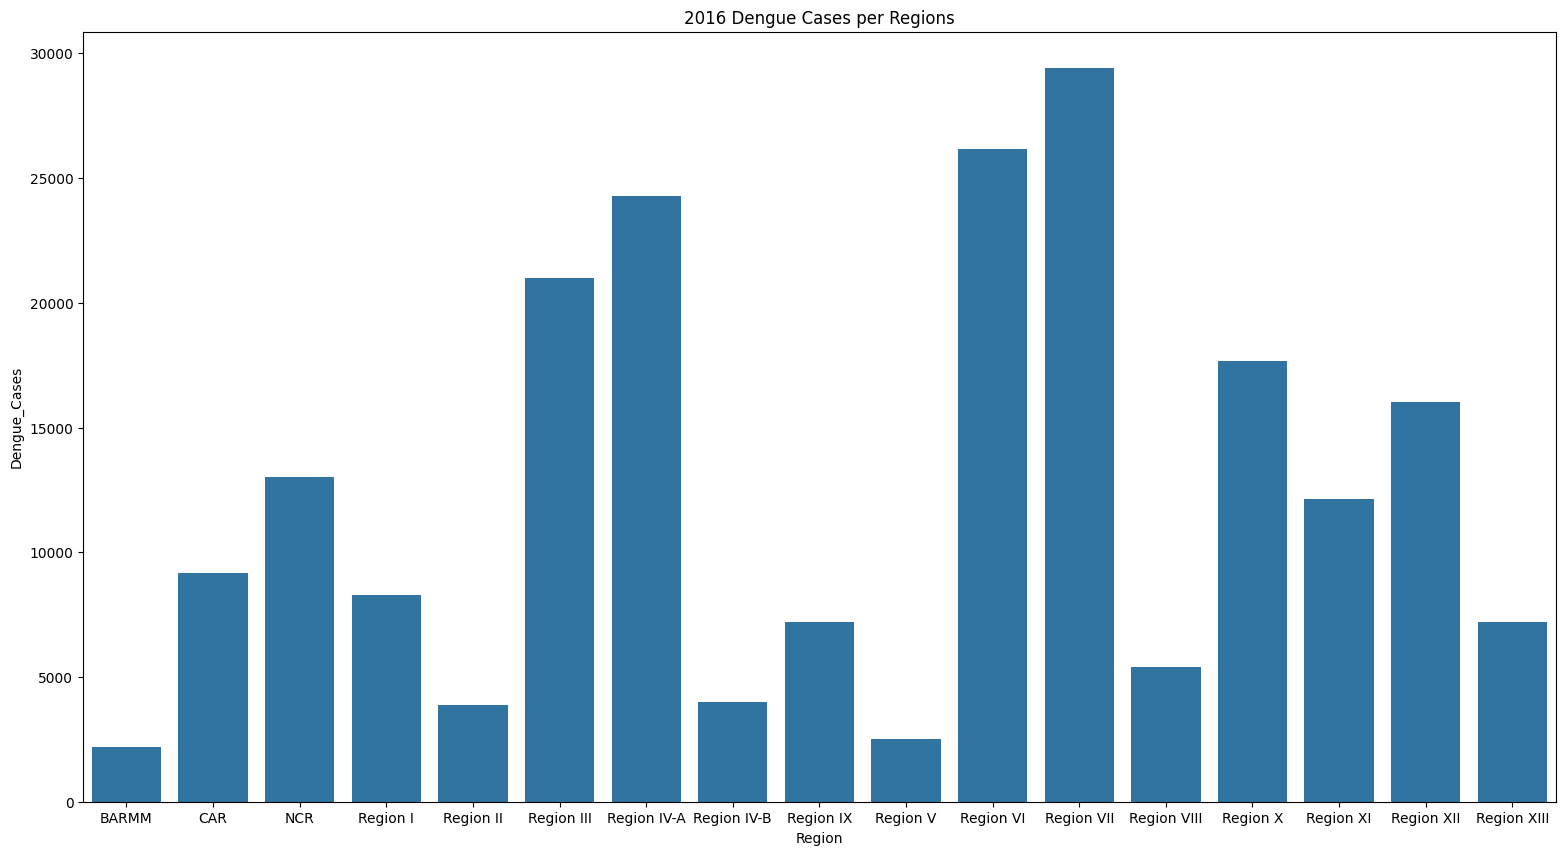

In [15]:
dengue16_Regions_cases = dengue_2016.groupby('Region')['Dengue_Cases'].sum().reset_index()
sns.barplot(data=dengue16_Regions_cases, x="Region", y="Dengue_Cases")
plt.title('2016 Dengue Cases per Regions')
plt.gcf().set_size_inches(19, 10) 
plt.show()


<h1>Dengue Cases in 2016 by Region</h1>
    <p><strong>Region VII:</strong> 29,395 cases, contributing 13.53% of total dengue cases.</p>
    <p><strong>Region VI:</strong> 26,170 cases, contributing 12.94% of total dengue cases.</p>
    <p><strong>Region IV-A:</strong> 24,282 cases, contributing 11.53% of total dengue cases.</p>
    <p><strong>Region III:</strong> 20,989 cases, contributing 9.96% of total dengue cases.</p>
    <p><strong>NCR:</strong> 13,002 cases, contributing 6.18% of total dengue cases.</p>
    <p><strong>Region XI:</strong> 12,137 cases, contributing 5.73% of total dengue cases.</p>
    <p><strong>Region XIII:</strong> 7,215 cases, contributing 3.43% of total dengue cases.</p>
    <p><strong>Region IX:</strong> 7,215 cases, contributing 3.43% of total dengue cases.</p>
    <p><strong>Region I:</strong> 8,281 cases, contributing 3.94% of total dengue cases.</p>
    <p><strong>Region XII:</strong> 16,013 cases, contributing 7.58% of total dengue cases.</p>
    <p><strong>Region II:</strong> 3,891 cases, contributing 1.85% of total dengue cases.</p>
    <p><strong>Region V:</strong> 2,532 cases, contributing 1.19% of total dengue cases.</p>
    <p><strong>CAR:</strong> 9,164 cases, contributing 4.31% of total dengue cases.</p>
    <p><strong>BARMM:</strong> 2,191 cases, contributing 1.03% of total dengue cases.</p>


<h1>No.2 Are there Any Regions with Significantly Higher Dengue Deaths Than Others?</h1>

In [16]:
dengue_fatality_overtheyears = dengue.groupby('Year')['Fatality_Rate'].sum().reset_index()

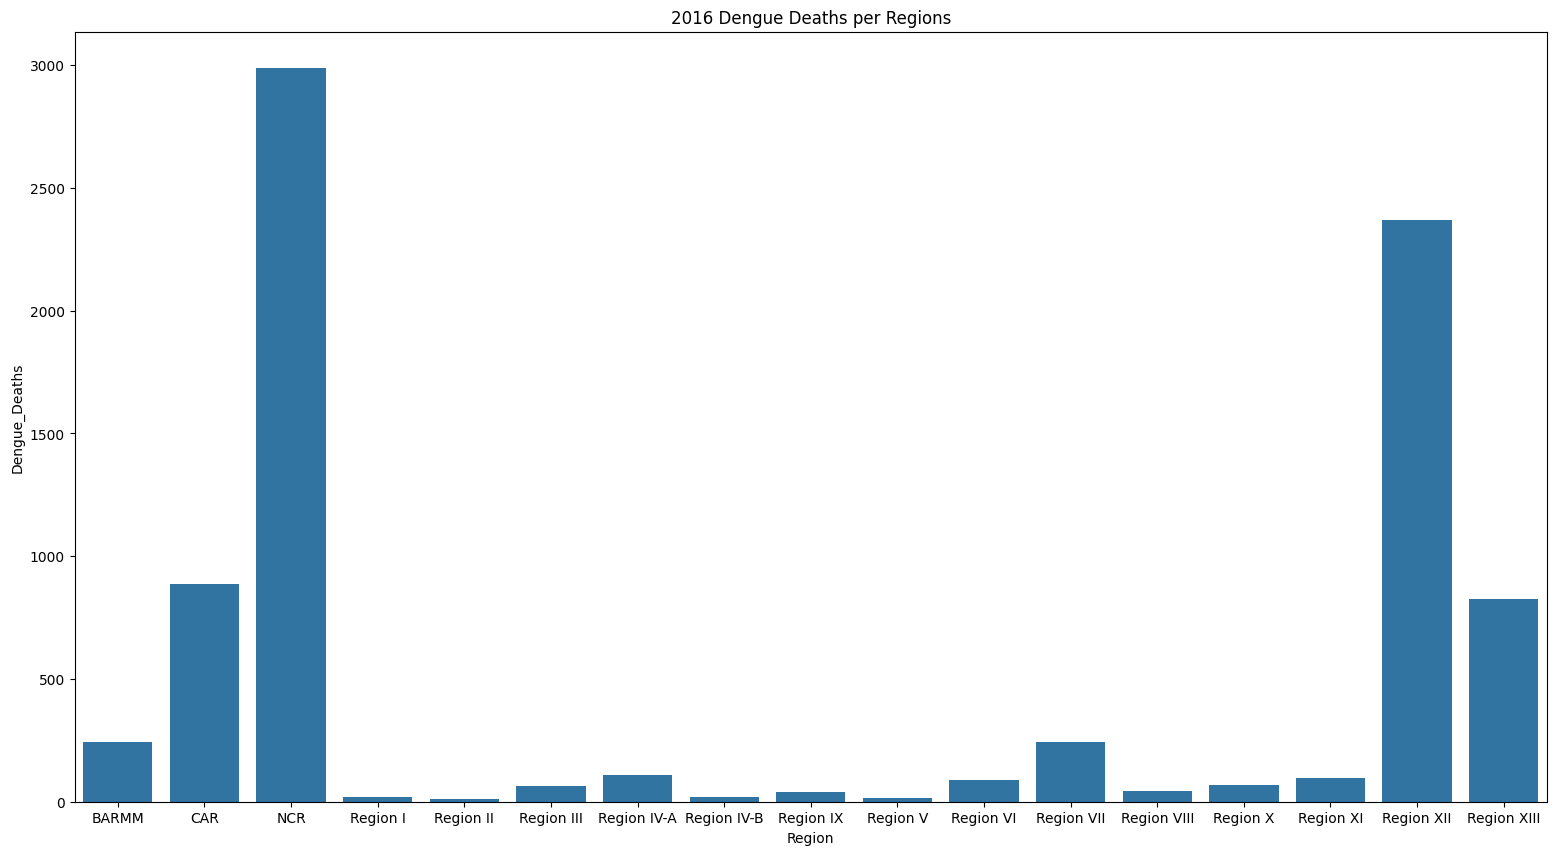

In [17]:
dengue16_Regions_deaths = dengue_2016.groupby('Region')['Dengue_Deaths'].sum().reset_index()
sns.barplot(data=dengue16_Regions_deaths, x="Region", y="Dengue_Deaths")
plt.title('2016 Dengue Deaths per Regions')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Dengue Deaths in 2016 by Region</h1>
    <p><strong>Region NCR:</strong> 2,987 deaths, contributing 16.91% of total dengue deaths.</p>
    <p><strong>Region XII:</strong> 2,369 deaths, contributing 13.37% of total dengue deaths.</p>
    <p><strong>Region XIII:</strong> 824 deaths, contributing 4.64% of total dengue deaths.</p>
    <p><strong>Region BARMM:</strong> 243 deaths, contributing 1.37% of total dengue deaths.</p>
    <p><strong>Region VII:</strong> 243 deaths, contributing 1.37% of total dengue deaths.</p>
    <p><strong>Region CAR:</strong> 888 deaths, contributing 5.03% of total dengue deaths.</p>
    <p><strong>Region I:</strong> 21 deaths, contributing 0.12% of total dengue deaths.</p>
    <p><strong>Region II:</strong> 11 deaths, contributing 0.06% of total dengue deaths.</p>
    <p><strong>Region III:</strong> 65 deaths, contributing 0.37% of total dengue deaths.</p>
    <p><strong>Region IV-A:</strong> 108 deaths, contributing 0.61% of total dengue deaths.</p>
    <p><strong>Region IV-B:</strong> 18 deaths, contributing 0.10% of total dengue deaths.</p>
    <p><strong>Region IX:</strong> 41 deaths, contributing 0.23% of total dengue deaths.</p>
    <p><strong>Region V:</strong> 16 deaths, contributing 0.09% of total dengue deaths.</p>
    <p><strong>Region VI:</strong> 87 deaths, contributing 0.49% of total dengue deaths.</p>
    <p><strong>Region VIII:</strong> 42 deaths, contributing 0.24% of total dengue deaths.</p>
    <p><strong>Region X:</strong> 69 deaths, contributing 0.39% of total dengue deaths.</p>
    <p><strong>Region XI:</strong> 95 deaths, contributing 0.54% of total dengue deaths.</p>


<h1>No.3 Year-to-Year Comparison of Case Fatality</h1>

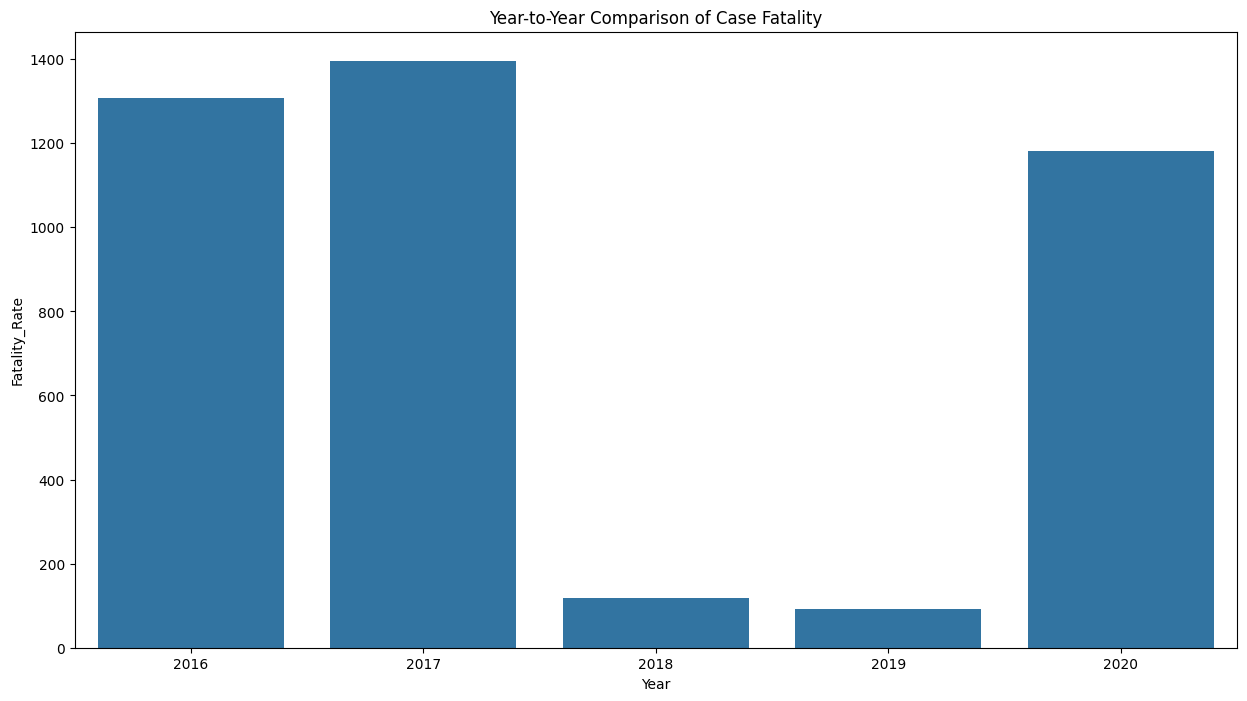

In [18]:
sns.barplot(data=dengue_fatality_overtheyears,x='Year',y='Fatality_Rate')
plt.title('Year-to-Year Comparison of Case Fatality')
plt.gcf().set_size_inches(15,8)
plt.show()

<h1>Dengue Fatality Rate Insights</h1>
        <li><strong>2016:</strong> The Fatality Rate was significantly high at <strong>1306.97%</strong></li>
        <li><strong>2017:</strong> The Fatality Rate increased slightly to <strong>1395.45%</strong></li>
        <li><strong>2018:</strong> A dramatic decrease in the Fatality Rate to <strong>117.98%</strong></li>
        <li><strong>2019:</strong> The Fatality Rate dropped further to <strong>91.57%</strong></li>
        <li><strong>2020:</strong> The Fatality Rate spiked back to <strong>1181.25%</strong></li>

<h1>No.4 Do Fatality Rates Vary Significantly Across Regions?</h1>

In [19]:
dengue_fatality_overtheRegions = dengue.groupby('Region')['Fatality_Rate'].sum().reset_index()

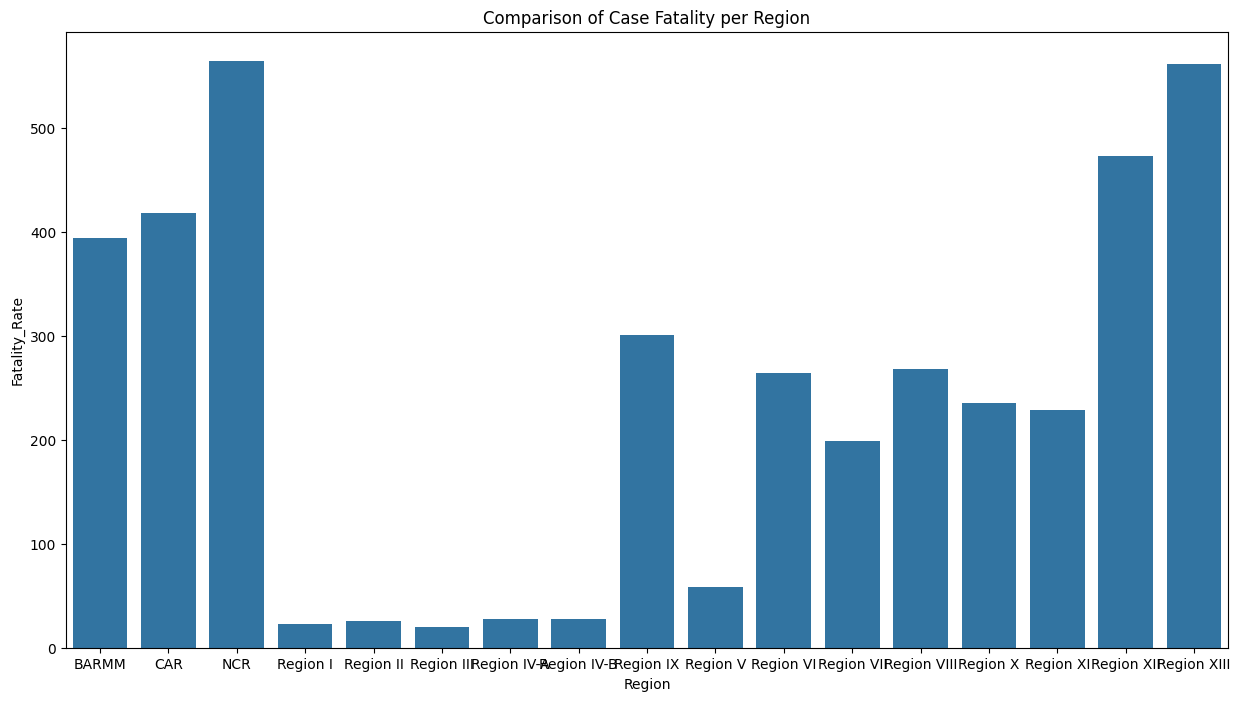

In [20]:
sns.barplot(data=dengue_fatality_overtheRegions,x='Region',y='Fatality_Rate')
plt.title('Comparison of Case Fatality per Region')
plt.gcf().set_size_inches(15,8)
plt.show()

<h1>Dengue Fatality Rate by Region</h1>
<p><strong>BARMM:</strong> Fatality rate: 394.41%</p>
<p><strong>CAR:</strong> Fatality rate: 418.40%</p>
<p><strong>NCR:</strong> Fatality rate: 564.76%</p>
<p><strong>Region I:</strong> Fatality rate: 23.28%</p>
<p><strong>Region II:</strong> Fatality rate: 25.87%</p>
<p><strong>Region III:</strong> Fatality rate: 19.71%</p>
<p><strong>Region IV-A:</strong> Fatality rate: 27.78%</p>
<p><strong>Region IV-B:</strong> Fatality rate: 27.55%</p>
<p><strong>Region IX:</strong> Fatality rate: 300.96%</p>
<p><strong>Region V:</strong> Fatality rate: 58.47%</p>
<p><strong>Region VI:</strong> Fatality rate: 264.29%</p>
<p><strong>Region VII:</strong> Fatality rate: 199.04%</p>
<p><strong>Region VIII:</strong> Fatality rate: 267.99%</p>
<p><strong>Region X:</strong> Fatality rate: 236.02%</p>
<p><strong>Region XI:</strong> Fatality rate: 229.00%</p>
<p><strong>Region XII:</strong> Fatality rate: 473.54%</p>
<p><strong>Region XIII:</strong> Fatality rate: 562.14%</p>


<h1>2017 Exploration</h1>

In [21]:
# dengue_2017

<h1>No.5 How do Dengue cases fluctuate across different months in 2017, and are there any noticeable seasonal trends in the occurrence of Dengue cases?</h1>

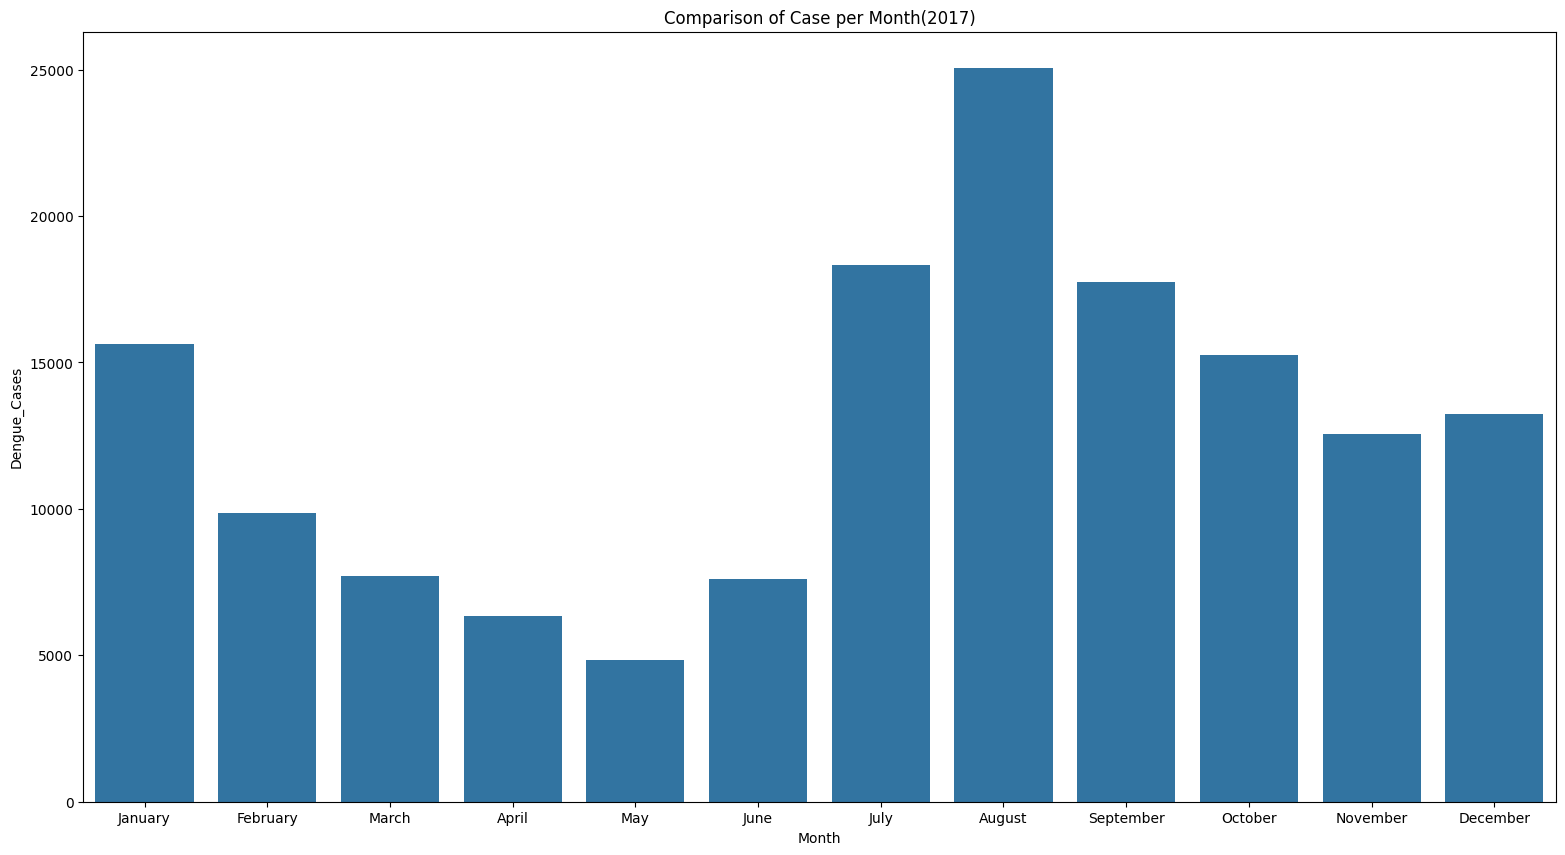

In [22]:
dengue17_Months_cases = dengue_2017.groupby('Month')['Dengue_Cases'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue17_Months_cases['Month'] = pd.Categorical(dengue17_Months_cases['Month'], categories=month_order, ordered=True)

sns.barplot(data=dengue17_Months_cases, x="Month", y="Dengue_Cases")
plt.title('Comparison of Case per Month(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>No.6 Dengue Cases per Month (Sorted from Highest to Lowest)</h1>
<p><strong>August:</strong> <strong>25039</strong> cases, contributing <strong>19.48%</strong> of the total cases.</p>
<p><strong>July:</strong> <strong>18340</strong> cases, contributing <strong>14.27%</strong> of the total cases.</p>
<p><strong>September:</strong> <strong>17753</strong> cases, contributing <strong>13.79%</strong> of the total cases.</p>
<p><strong>October:</strong> <strong>15259</strong> cases, contributing <strong>11.87%</strong> of the total cases.</p>
<p><strong>January:</strong> <strong>15623</strong> cases, contributing <strong>12.12%</strong> of the total cases.</p>
<p><strong>December:</strong> <strong>13235</strong> cases, contributing <strong>10.28%</strong> of the total cases.</p>
<p><strong>November:</strong> <strong>12553</strong> cases, contributing <strong>9.75%</strong> of the total cases.</p>
<p><strong>February:</strong> <strong>9872</strong> cases, contributing <strong>7.68%</strong> of the total cases.</p>
<p><strong>March:</strong> <strong>7696</strong> cases, contributing <strong>5.98%</strong> of the total cases.</p>
<p><strong>April:</strong> <strong>6343</strong> cases, contributing <strong>4.91%</strong> of the total cases.</p>
<p><strong>June:</strong> <strong>7589</strong> cases, contributing <strong>5.89%</strong> of the total cases.</p>
<p><strong>May:</strong> <strong>4853</strong> cases, contributing <strong>3.77%</strong> of the total cases.</p>


<h1>No.7Total Cases & Deaths per Year</h1>

In [23]:
tot_case_death_year = dengue.groupby("Year")[["Dengue_Cases", "Dengue_Deaths"]].sum()

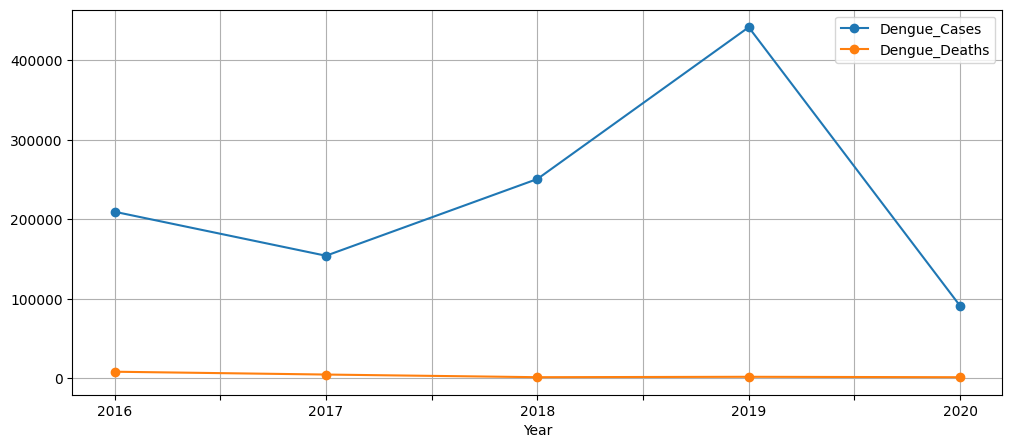

In [24]:
tot_case_death_year.plot(kind='line', marker='o', grid=True)
plt.gcf().set_size_inches(12,5)
plt.show()

<h1>No.8</h1>

In [25]:
tot_case_death_region = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()

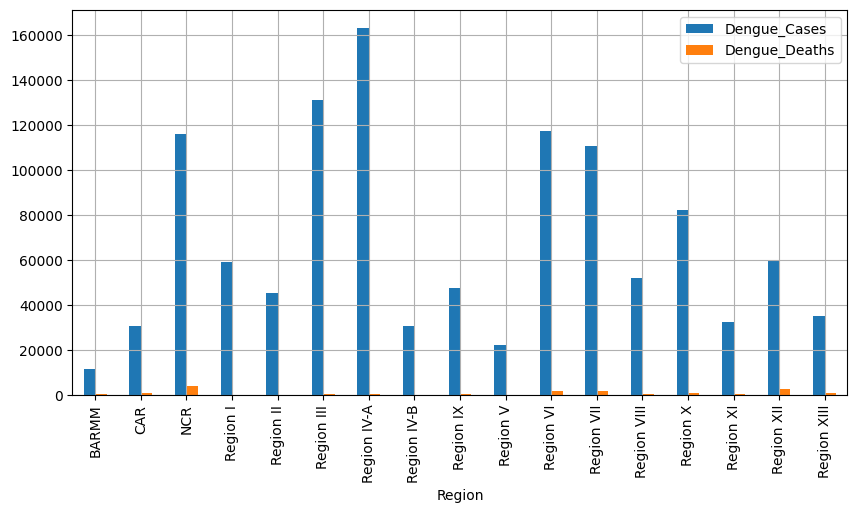

In [26]:
tot_case_death_region.plot(kind='bar', grid=True)
plt.gcf().set_size_inches(10,5)
plt.show()

In [27]:
dengue_2016['Fatality_Rate']

0        0.141844
1        0.000000
2        0.000000
3        0.833333
4        0.411523
          ...    
967      0.611621
968     84.677419
969    132.926829
970      0.699301
971      1.234568
Name: Fatality_Rate, Length: 204, dtype: float64

<h1>No.10</h1>

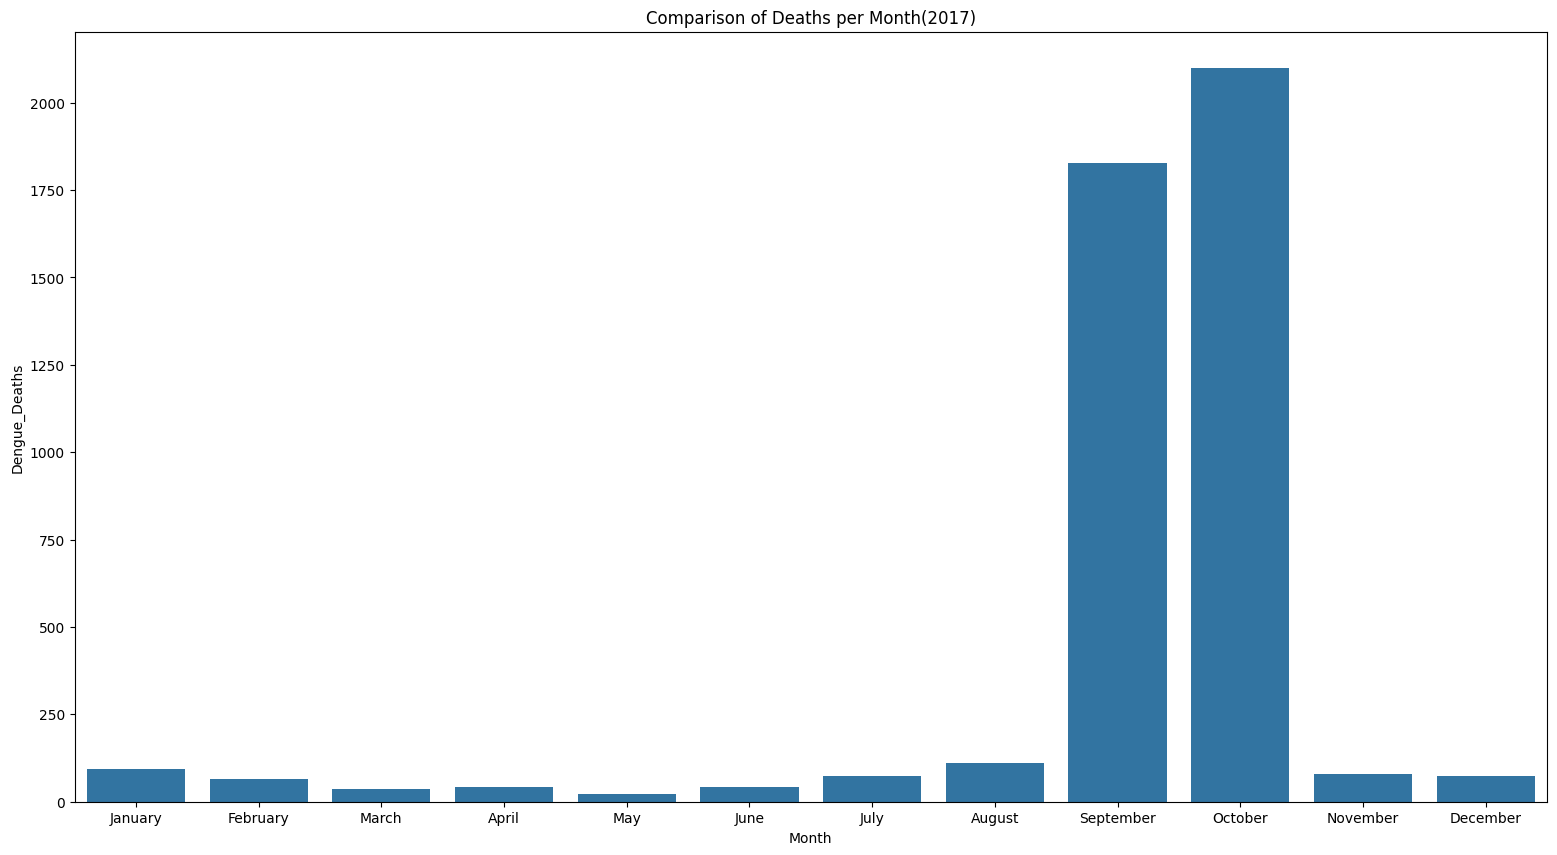

In [28]:
dengue17_Months_Death_cases = dengue_2017.groupby('Month')['Dengue_Deaths'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue17_Months_Death_cases['Month'] = pd.Categorical(dengue17_Months_Death_cases['Month'], categories=month_order, ordered=True)

sns.barplot(data=dengue17_Months_Death_cases, x="Month", y="Dengue_Deaths")
plt.title('Comparison of Deaths per Month(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

In [29]:
# dengue17_comparison = dengue_2017.groupby('Month')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()
# Month_order: {0: 'January', 1: 'February', 2: 'March', 3: 'April', 4: 'May', 5: 'June', 6: 'July', 7: 'August', 8: 'September', 9: 'October', 10: 'November', 11: 'December'}
# dengue17_comparison['Month'].index

# dengue17_comparison.plot(kind='bar', stacked=True)
# plt.title('Comparison of Dengue Deaths & Cases per Month(2017)')
# plt.gcf().set_size_inches(15,8)
# plt.xlabel('month')
# plt.show()

<h1>No.11</h1>

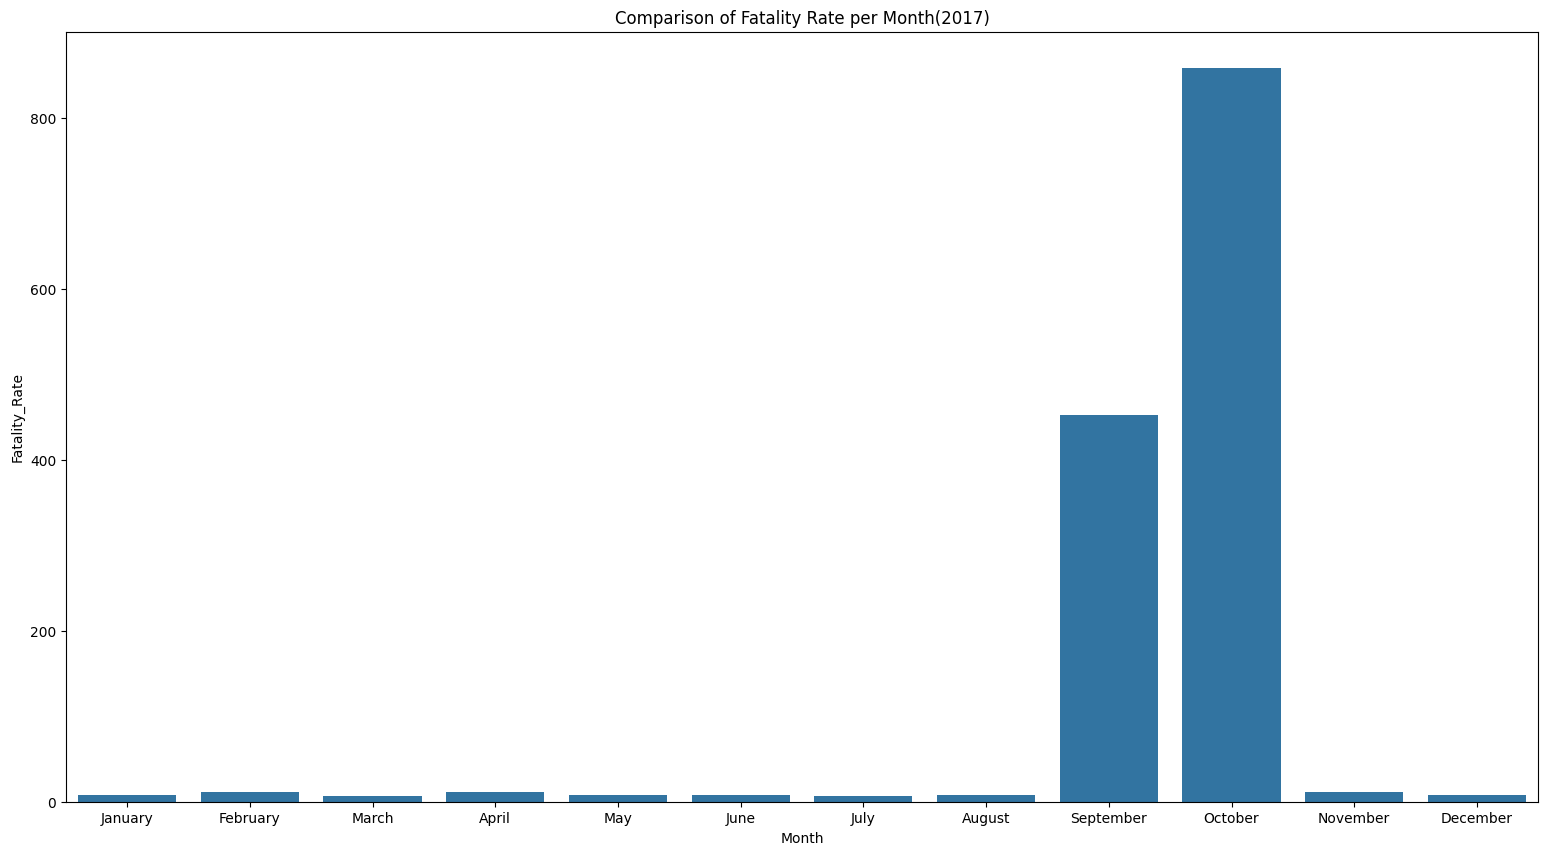

In [30]:
dengue17_Months_Fatality_cases = dengue_2017.groupby('Month')['Fatality_Rate'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue17_Months_Fatality_cases['Month'] = pd.Categorical(dengue17_Months_Fatality_cases['Month'], categories=month_order, ordered=True)

sns.barplot(data=dengue17_Months_Fatality_cases, x="Month", y="Fatality_Rate")
plt.title('Comparison of Fatality Rate per Month(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>No.12</h1>

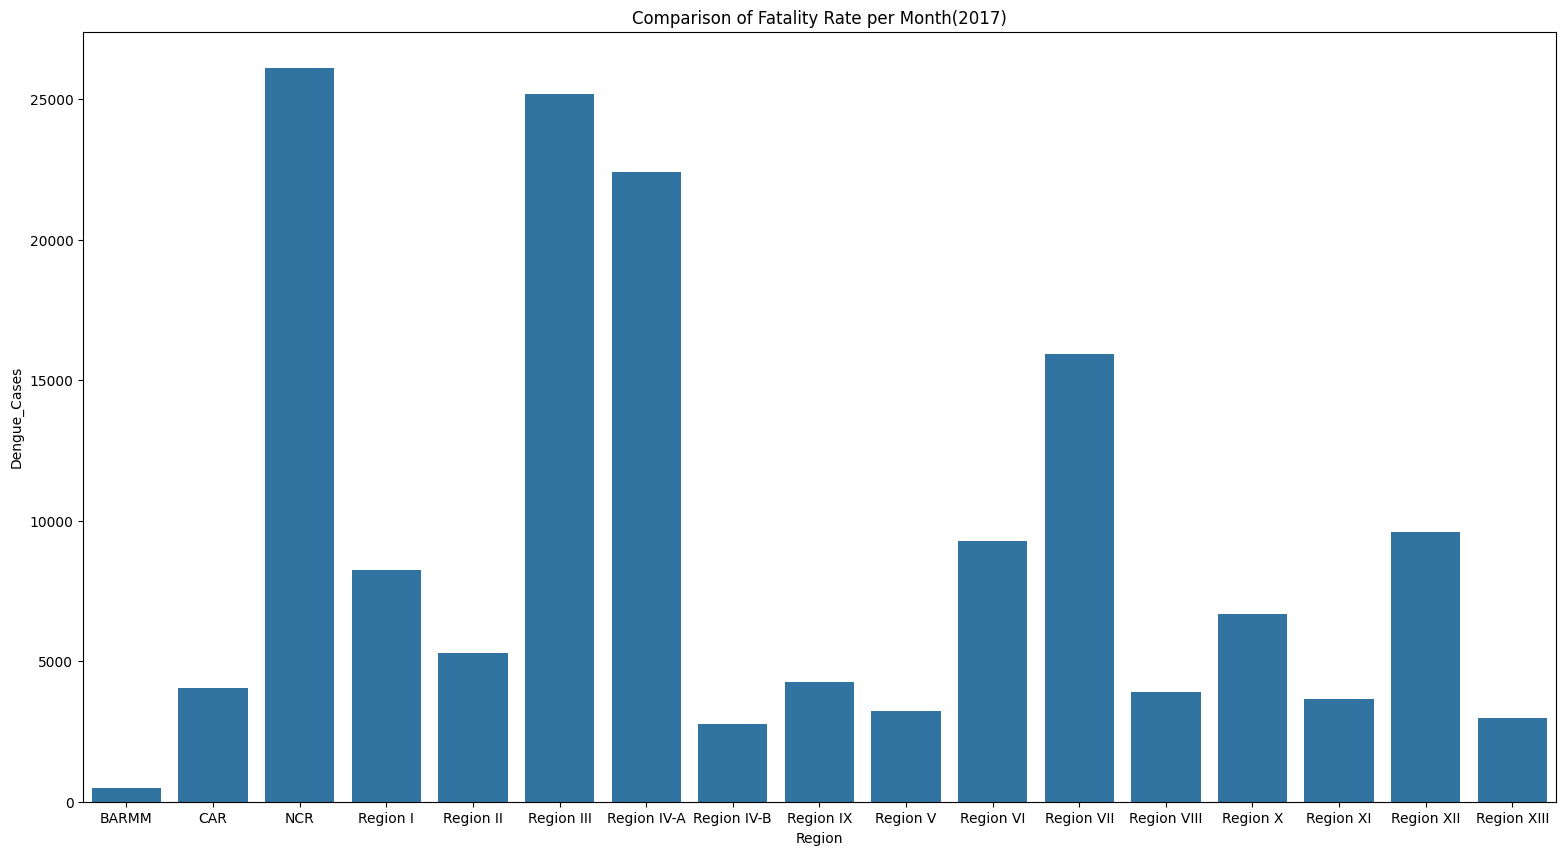

In [31]:
dengue17_Regions_Fatality_cases = dengue_2017.groupby('Region')['Dengue_Cases'].sum().reset_index()

sns.barplot(data=dengue17_Regions_Fatality_cases, x="Region", y="Dengue_Cases")
plt.title('Comparison of Fatality Rate per Month(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>No.13</h1>

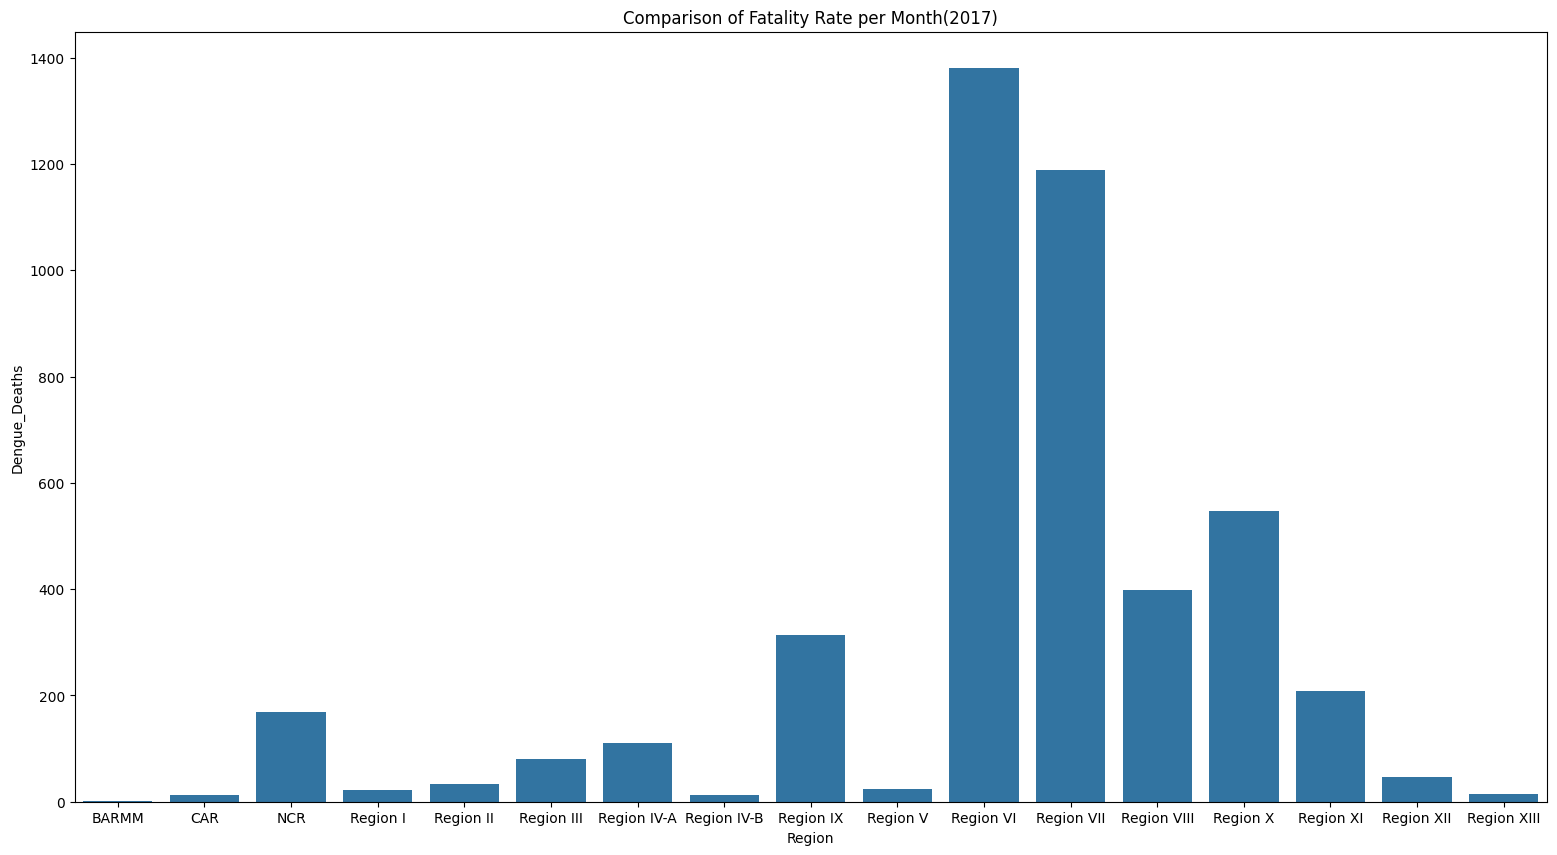

In [32]:
dengue17_Regions_Death_cases = dengue_2017.groupby('Region')['Dengue_Deaths'].sum().reset_index()

sns.barplot(data=dengue17_Regions_Death_cases, x="Region", y="Dengue_Deaths")
plt.title('Comparison of Fatality Rate per Month(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

In [ ]:
dengue_2017

<h1>No.14</h1>

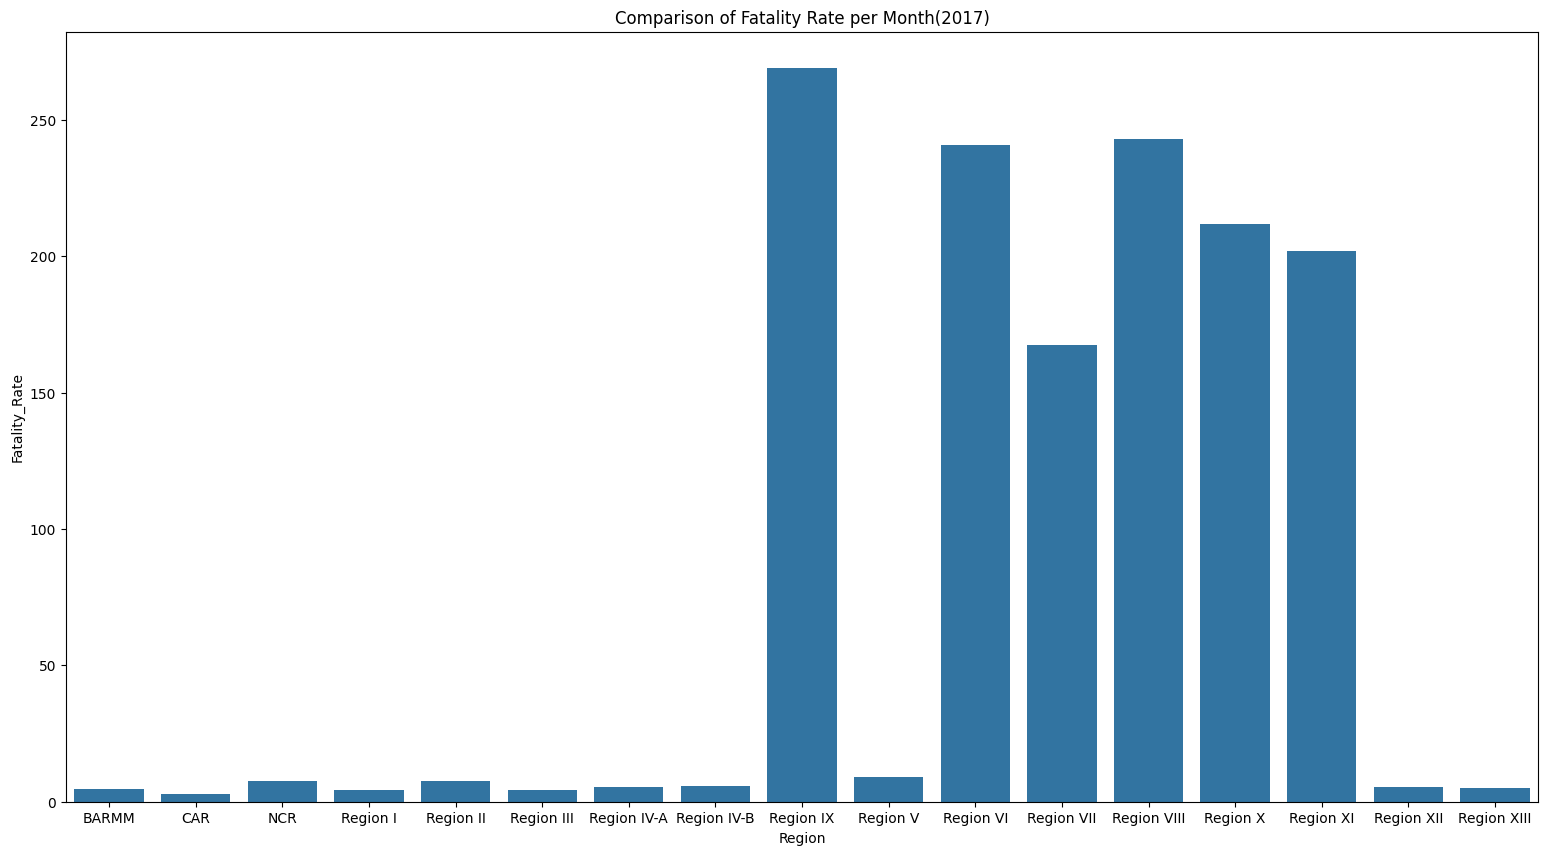

In [33]:
dengue17_Regions_Fatality_cases = dengue_2017.groupby('Region')['Fatality_Rate'].sum().reset_index()

sns.barplot(data=dengue17_Regions_Fatality_cases, x="Region", y="Fatality_Rate")
plt.title('Comparison of Fatality Rate per Month(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Dengue Cases and Deaths Insights by Region</h1>
<p><b>BARMM</b> recorded <b>11,537 cases</b> (1.61%) and <b>332 deaths</b> (1.45%).</p>
<p><b>CAR</b> recorded <b>30,582 cases</b> (4.28%) and <b>1,008 deaths</b> (4.41%).</p>
<p><b>NCR</b> recorded <b>115,966 cases</b> (16.18%) and <b>4,008 deaths</b> (17.55%).</p>
<p><b>Region I</b> recorded <b>59,066 cases</b> (8.24%) and <b>157 deaths</b> (0.69%).</p>
<p><b>Region II</b> recorded <b>45,141 cases</b> (6.30%) and <b>193 deaths</b> (0.84%).</p>
<p><b>Region III</b> recorded <b>131,064 cases</b> (18.29%) and <b>482 deaths</b> (2.11%).</p>
<p><b>Region IV-A</b> recorded <b>163,029 cases</b> (22.75%) and <b>652 deaths</b> (2.86%).</p>
<p><b>Region IV-B</b> recorded <b>30,849 cases</b> (4.31%) and <b>130 deaths</b> (0.57%).</p>
<p><b>Region IX</b> recorded <b>47,781 cases</b> (6.67%) and <b>532 deaths</b> (2.33%).</p>
<p><b>Region V</b> recorded <b>22,167 cases</b> (3.09%) and <b>185 deaths</b> (0.81%).</p>
<p><b>Region VI</b> recorded <b>117,523 cases</b> (16.40%) and <b>1,825 deaths</b> (7.99%).</p>
<p><b>Region VII</b> recorded <b>110,683 cases</b> (15.45%) and <b>1,760 deaths</b> (7.70%).</p>
<p><b>Region VIII</b> recorded <b>51,983 cases</b> (7.25%) and <b>585 deaths</b> (2.56%).</p>
<p><b>Region X</b> recorded <b>82,437 cases</b> (11.50%) and <b>848 deaths</b> (3.71%).</p>
<p><b>Region XI</b> recorded <b>32,522 cases</b> (4.54%) and <b>385 deaths</b> (1.69%).</p>
<p><b>Region XII</b> recorded <b>59,802 cases</b> (8.34%) and <b>2,796 deaths</b> (12.24%).</p>
<p><b>Region XIII</b> recorded <b>35,293 cases</b> (4.92%) and <b>966 deaths</b> (4.23%).</p>


<h1>Region 6 investigations</h1>

In [46]:
dengue_region_6 = dengue_2017[dengue_2017['Region'] == 'Region VI']

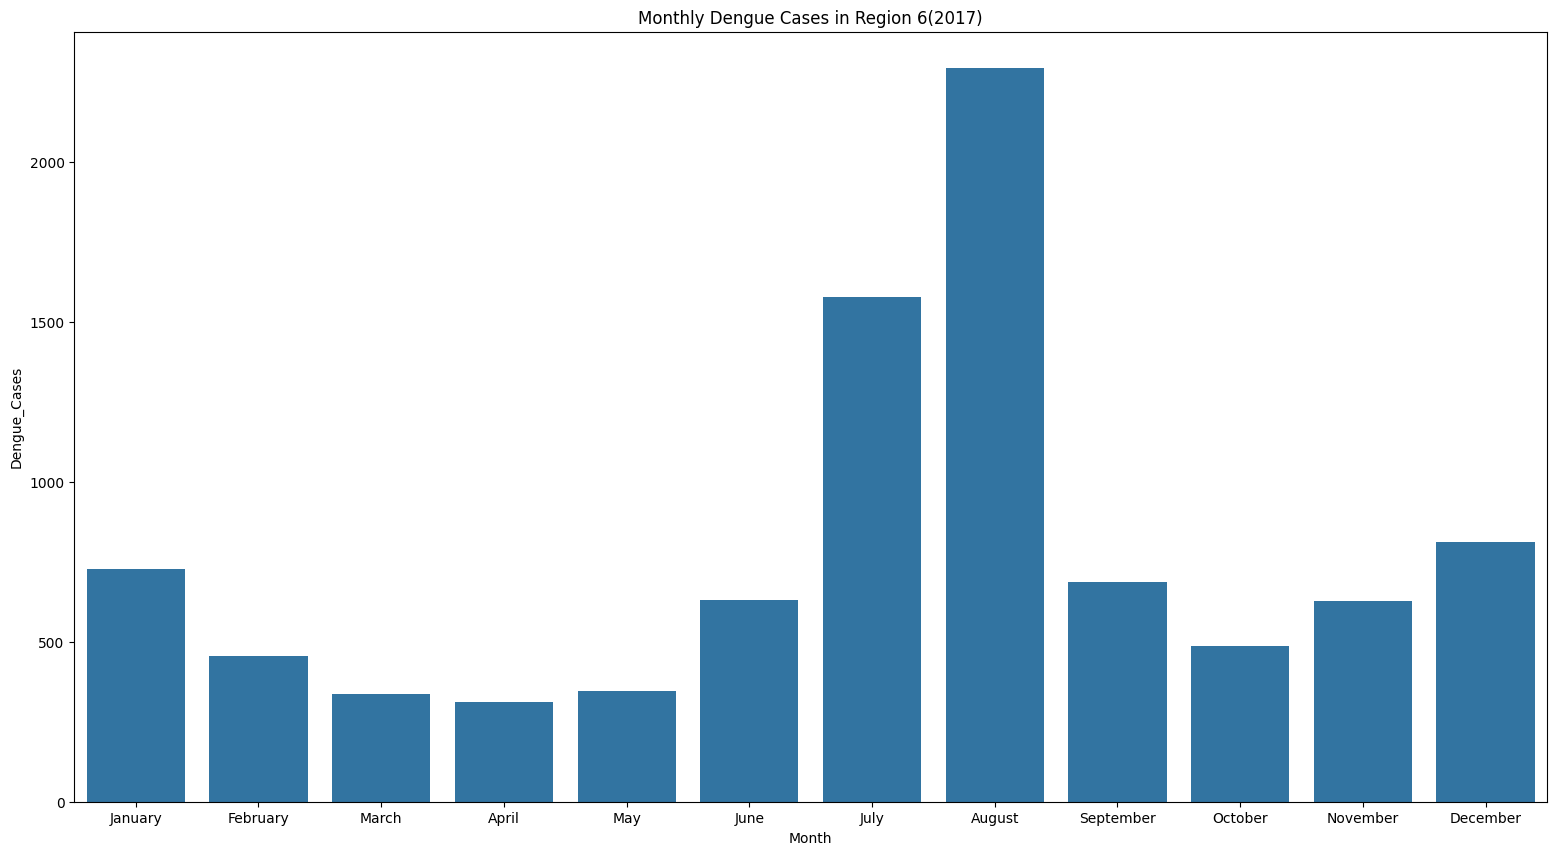

In [58]:
region6_Month_Cases = dengue_region_6.groupby('Month')['Dengue_Cases'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
region6_Month_Cases['Month'] = pd.Categorical(region6_Month_Cases['Month'], categories=month_order, ordered=True)

sns.barplot(data=region6_Month_Cases, x="Month", y="Dengue_Cases")
plt.title('Monthly Dengue Cases in Region 6(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

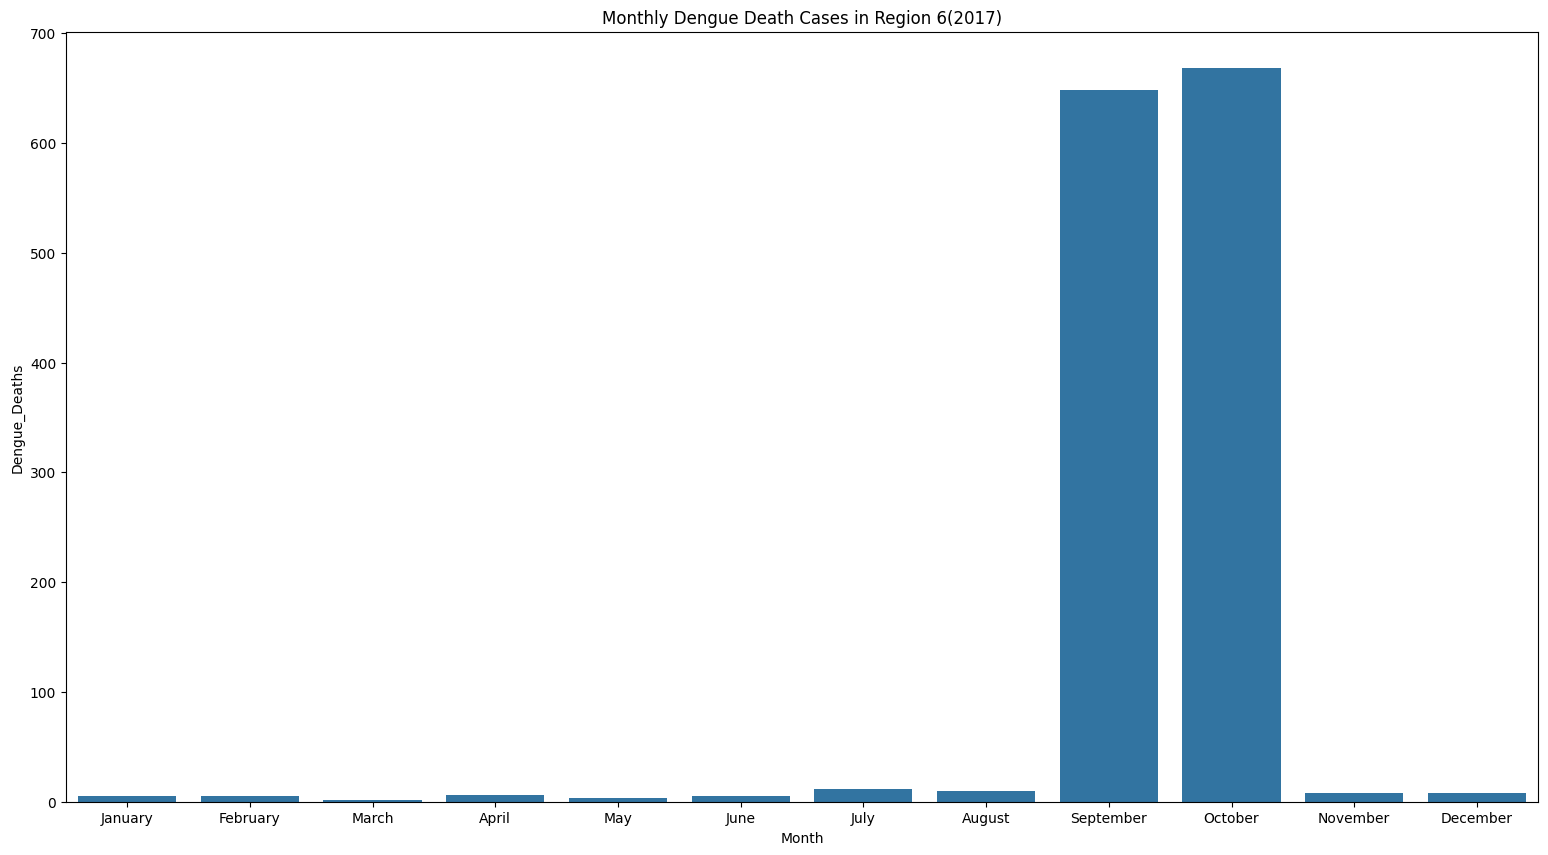

In [57]:
region6_Month_Deaths = dengue_region_6.groupby('Month')['Dengue_Deaths'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
region6_Month_Deaths['Month'] = pd.Categorical(region6_Month_Deaths['Month'], categories=month_order, ordered=True)

sns.barplot(data=region6_Month_Deaths, x="Month", y="Dengue_Deaths")
plt.title('Monthly Dengue Death Cases in Region 6(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

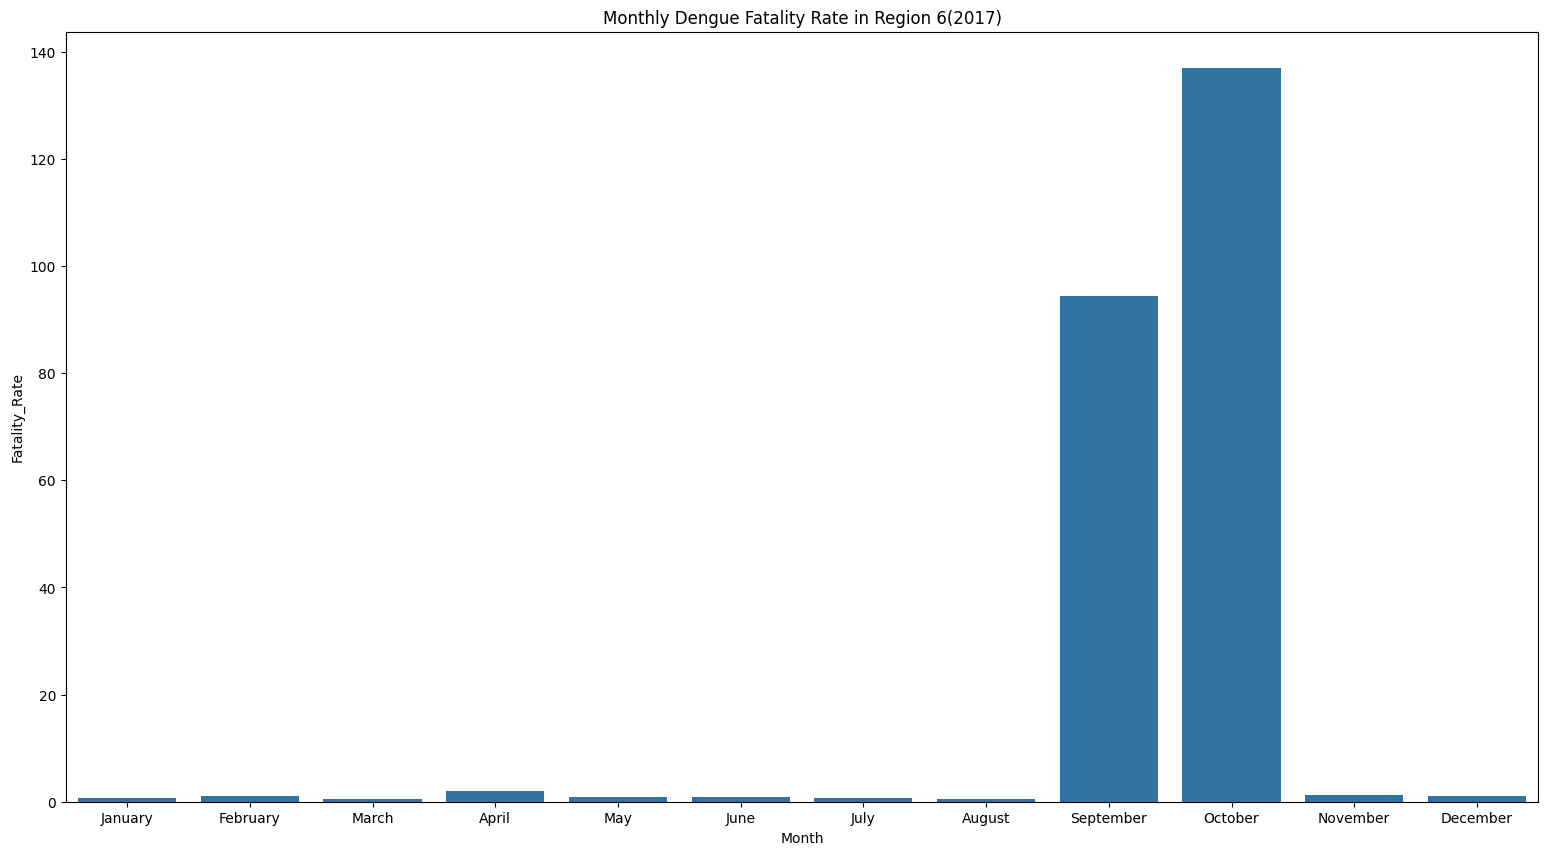

In [59]:
region6_Month_Fatality = dengue_region_6.groupby('Month')['Fatality_Rate'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
region6_Month_Fatality['Month'] = pd.Categorical(region6_Month_Fatality['Month'], categories=month_order, ordered=True)

sns.barplot(data=region6_Month_Fatality, x="Month", y="Fatality_Rate")
plt.title('Monthly Dengue Fatality Rate in Region 6(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

In [34]:
dengue["Cases_Growth"] = dengue["Dengue_Cases"].pct_change() * 100
dengue["Deaths_Growth"] = dengue["Dengue_Deaths"].pct_change() * 100

In [35]:
dengue["Cases_Growth"]

0             NaN
1      -46.950355
2      -26.203209
3      -13.043478
4        1.250000
          ...    
1015    -9.000000
1016   -82.417582
1017   -18.750000
1018    15.384615
1019    53.333333
Name: Cases_Growth, Length: 1020, dtype: float64

In [36]:
dengue["Deaths_Growth"].unique()

array([            nan, -1.00000000e+02,             inf, -5.00000000e+01,
        0.00000000e+00,  1.00000000e+02,  5.00000000e+01, -8.33333333e+01,
        2.00000000e+02,  6.66666667e+01, -4.00000000e+01, -6.66666667e+01,
        2.25000000e+02, -2.30769231e+01, -2.00000000e+01, -8.75000000e+01,
        5.00000000e+02,  2.22222222e+01, -1.81818182e+01, -3.33333333e+01,
        1.50000000e+02, -6.00000000e+01,  6.00000000e+02, -5.71428571e+01,
        3.00000000e+02,  3.33333333e+01, -1.66666667e+01,  2.40000000e+02,
        5.88235294e+00,  4.00000000e+02, -8.33333333e+00, -7.27272727e+01,
        6.00000000e+01,  1.81818182e+01, -6.15384615e+01,  2.00000000e+01,
        1.66666667e+01,  4.28571429e+01, -2.50000000e+01,  2.80000000e+02,
       -5.26315789e+00, -5.83333333e+01,  4.00000000e+01, -4.28571429e+01,
        2.50000000e+01,  3.50000000e+02, -5.55555556e+00,  6.11764706e+02,
       -9.58677686e+01,  1.75000000e+02, -4.54545455e+01,  1.33333333e+02,
       -7.14285714e+01, -